Setup Environment & Load the PKL  

In [22]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter


# Set visualization style
sns.set(style="whitegrid")
%matplotlib inline 


PKL_PATH = r'C:\Users\Yeabsera Abebe\OneDrive\Documents\CODE\iCog\SP Miner\neural-subgraph-matcher-miner\ciscoDatasets\spminer_input.pkl'

print('Loading:', PKL_PATH)
with open(PKL_PATH, 'rb') as f:
    data = pickle.load(f)

print('Top-level type:', type(data))
if isinstance(data, list):
    print('Number of graphs in PKL:', len(data))
    
G = data[0] if isinstance(data, list) else data

print('Graph type:', type(G))
print('Directed?:', G.is_directed())
print('Nodes:', G.number_of_nodes())
print('Edges:', G.number_of_edges())

# show first 10 nodes and first 10 edges with attributes
nodes_sample = list(G.nodes())[:10]
edges_sample = list(G.edges(data=True))[:10]
print('\nSample nodes:', nodes_sample)
print('\nSample edges (src, dst, attrs):')
for e in edges_sample:
    print(e)


Loading: C:\Users\Yeabsera Abebe\OneDrive\Documents\CODE\iCog\SP Miner\neural-subgraph-matcher-miner\ciscoDatasets\spminer_input.pkl
Top-level type: <class 'list'>
Number of graphs in PKL: 1
Graph type: <class 'networkx.classes.digraph.DiGraph'>
Directed?: True
Nodes: 31
Edges: 690

Sample nodes: [38, 8, 46, 23, 44, 48, 34, 31, 24, 28]

Sample edges (src, dst, attrs):
(38, 8, {'counts': [32], 'ports': [6], 'protocols': [1]})
(38, 44, {'counts': [1], 'ports': [6], 'protocols': [1]})
(38, 49, {'counts': [1, 1], 'ports': [17, 6], 'protocols': [1, 1]})
(38, 42, {'counts': [1], 'ports': [6], 'protocols': [1]})
(38, 34, {'counts': [1, 1], 'ports': [17, 6], 'protocols': [1, 1]})
(38, 40, {'counts': [1, 3, 1], 'ports': [17, 17, 6], 'protocols': [1, 1, 1]})
(38, 5, {'counts': [1, 1], 'ports': [17, 6], 'protocols': [1, 1]})
(38, 7, {'counts': [12, 1, 1], 'ports': [6, 6, 17], 'protocols': [1, 1, 1]})
(38, 9, {'counts': [32], 'ports': [6], 'protocols': [1]})
(38, 18, {'counts': [1, 1], 'ports': [1

Visualization

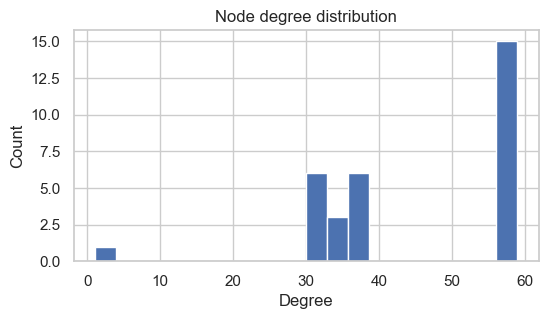

In [23]:
# Degree distribution
deg = dict(G.degree())
degrees = list(deg.values())
plt.figure(figsize=(6,3))
plt.hist(degrees, bins=20)
plt.title('Node degree distribution')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()


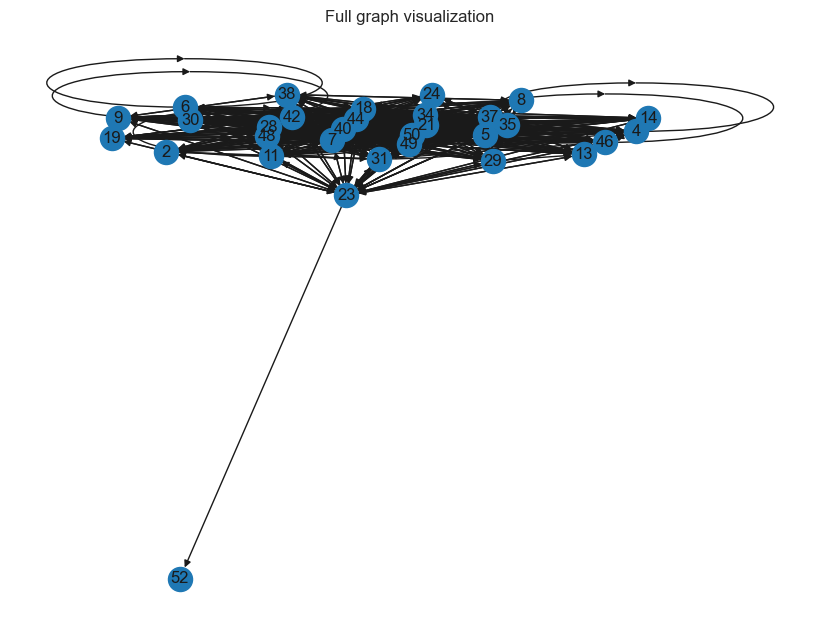

In [24]:
# Visualize full graph if small, else sample subgraph
MAX_VIS = 200
if G.number_of_nodes() <= MAX_VIS:
    plt.figure(figsize=(8,6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos=pos, with_labels=True, node_size=300)
    plt.title('Full graph visualization')
    plt.show()
else:
    # sample a subgraph around a high-degree node
    hub = max(deg, key=deg.get)
    nbrs = list(nx.ego_graph(G, hub, radius=1).nodes())
    SG = G.subgraph(nbrs).copy()
    
    plt.figure(figsize=(8,6))
    pos = nx.spring_layout(SG, seed=42)
    nx.draw(SG, pos=pos, with_labels=True, node_size=300)
    plt.title(f'Subgraph around hub node {hub} (radius=1)')
    plt.show()
